# Import necessary library

In [1]:
# %%HTML
# <style>
#     .output {
#         display: none;
#     }
# </style>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
visa_dataset = pd.read_csv("passportdetails.csv")

In [4]:
visa_dataset.head()

,Origin,Destination,Requirement
0,Afghanistan,Afghanistan,NaN
1,Afghanistan,Albania,Visa Required
2,Afghanistan,Algeria,Visa Required
3,Afghanistan,American Samoa,Visa Required
4,Afghanistan,Andorra,Visa Required


In [5]:
visa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45173 entries, 0 to 45172
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Origin       45173 non-null  object
 1   Destination  45173 non-null  object
 2   Requirement  44974 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [6]:
visa_dataset.describe()

,Origin,Destination,Requirement
count,45173,45173,44974
unique,199,227,2
top,Afghanistan,Afghanistan,Visa Required
freq,227,199,22803


In [7]:
print("\nOrigin Counts:",visa_dataset['Origin'].value_counts())
print("\nDestination Counts:", visa_dataset['Destination'].value_counts())


Origin Counts: Origin
Afghanistan              227
Niger                    227
North Korea              227
North Macedonia          227
Norway                   227
                        ... 
Guyana                   227
Haiti                    227
Honduras                 227
Hong Kong (SAR China)    227
eSwatini                 227
Name: count, Length: 199, dtype: int64

Destination Counts: Destination
Afghanistan    199
San Marino     199
Nicaragua      199
Niger          199
Nigeria        199
              ... 
Greece         199
Greenland      199
Grenada        199
Guam           199
eSwatini       199
Name: count, Length: 227, dtype: int64


In [8]:
visa_dataset.duplicated().sum()

0

In [9]:
visa_dataset.isnull().sum().to_frame().rename(columns={0:'total no. of missing values'})

,total no. of missing values
Origin,0
Destination,0
Requirement,199


### Here are total 199 unique countries and in dataset where origin & destination country are same there is null value in Requirement col. and we can change it to Visa Free, as we don't need visa to travel to same country.

In [10]:
visa_dataset['Requirement'].fillna('Visa Free', inplace=True)
visa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45173 entries, 0 to 45172
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Origin       45173 non-null  object
 1   Destination  45173 non-null  object
 2   Requirement  45173 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [11]:
visa_dataset.describe()

,Origin,Destination,Requirement
count,45173,45173,45173
unique,199,227,2
top,Afghanistan,Afghanistan,Visa Required
freq,227,199,22803


In [12]:
class_counts = visa_dataset['Requirement'].value_counts()

# Display the counts
print(class_counts)


Requirement
Visa Required    22803
Visa Free        22370
Name: count, dtype: int64


In [13]:
print("\nOrigin Counts:",visa_dataset['Origin'].value_counts())
print("\nDestination Counts:", visa_dataset['Destination'].value_counts())


Origin Counts: Origin
Afghanistan              227
Niger                    227
North Korea              227
North Macedonia          227
Norway                   227
                        ... 
Guyana                   227
Haiti                    227
Honduras                 227
Hong Kong (SAR China)    227
eSwatini                 227
Name: count, Length: 199, dtype: int64

Destination Counts: Destination
Afghanistan    199
San Marino     199
Nicaragua      199
Niger          199
Nigeria        199
              ... 
Greece         199
Greenland      199
Grenada        199
Guam           199
eSwatini       199
Name: count, Length: 227, dtype: int64


# Exploratory data analysis

Requirement       Origin  Visa Free  Visa Required
0            Afghanistan         29            198
1                Albania        124            103
2                Algeria         57            170
3                Andorra        172             55
4                 Angola         54            173
..                   ...        ...            ...
194              Vietnam         56            171
195                Yemen         36            191
196               Zambia         72            155
197             Zimbabwe         67            160
198             eSwatini         79            148

[199 rows x 3 columns]


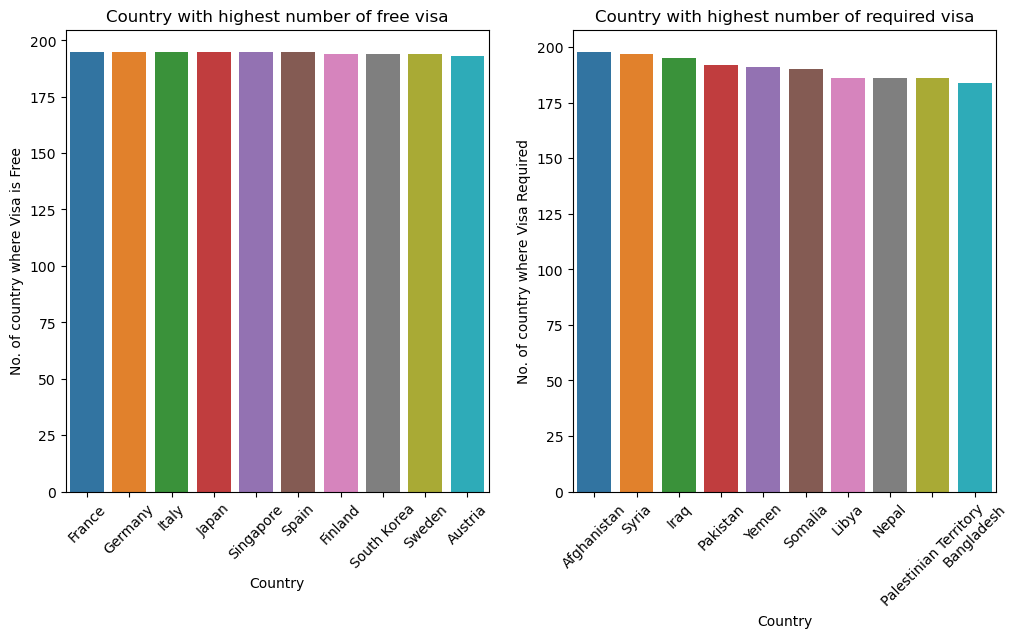

In [14]:
count_df = visa_dataset.groupby(['Origin', 'Requirement']).size().unstack().reset_index()
print(count_df)

strong_country = count_df[['Origin','Visa Free']].nlargest(10,'Visa Free')
strong_country.reset_index(drop=True, inplace=True)

weak_country = count_df[['Origin','Visa Required']].nlargest(10,'Visa Required')
weak_country.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x='Origin', y='Visa Free', data=strong_country)
plt.xlabel("Country")
plt.ylabel("No. of country where Visa is Free")
plt.title("Country with highest number of free visa")
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sns.barplot(x='Origin', y='Visa Required', data=weak_country)
plt.xlabel("Country")
plt.ylabel("No. of country where Visa Required")
plt.title("Country with highest number of required visa")
plt.xticks(rotation=45);


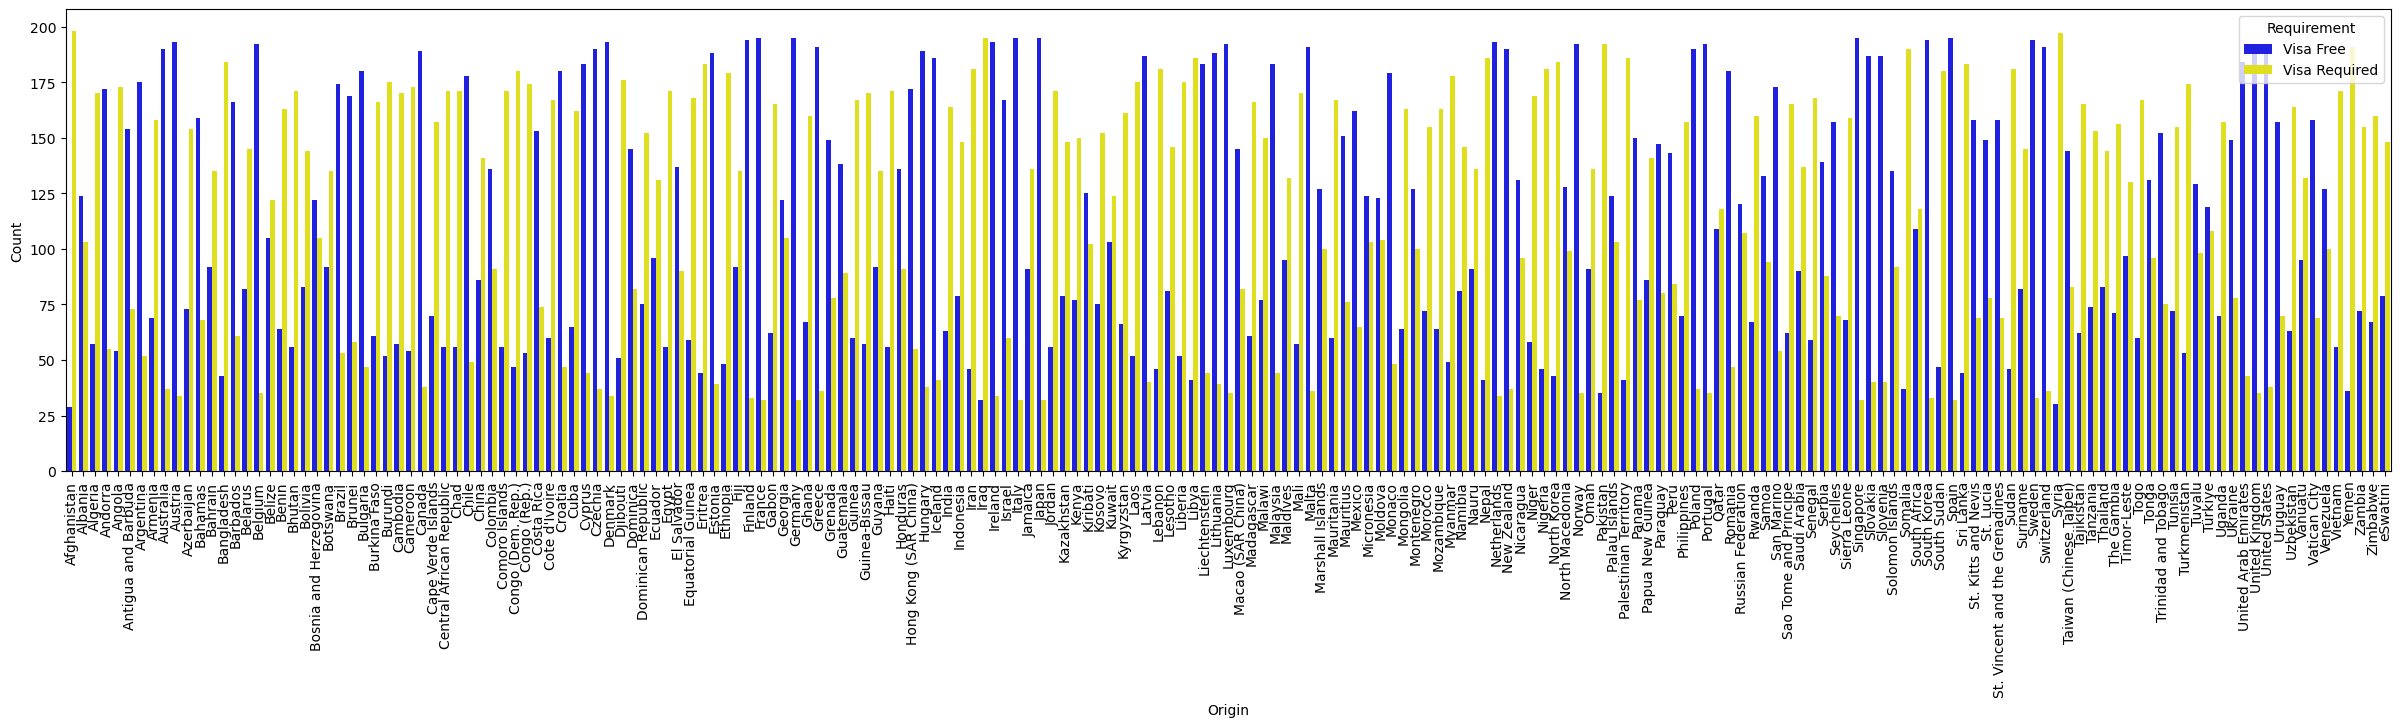

In [15]:
plt.figure(figsize=(30, 6))
melted_df = pd.melt(count_df, id_vars=['Origin'], value_vars=['Visa Free', 'Visa Required'], var_name='Requirement', value_name='Count')
#print(melted_df)
# Plotting with Seaborn
sns.barplot(x='Origin', y='Count', hue='Requirement', data=melted_df, palette={'Visa Free': 'blue', 'Visa Required': 'yellow'})
plt.xticks(rotation=90);  #here at last, I used semicolon and thus results wont show that array just fig.

           Destination  Count
0              Burundi    199
1   Cape Verde Islands    199
2       Comoro Islands    199
3         Cook Islands    199
4             Djibouti    199
5        Guinea-Bissau    199
6                Kenya    199
7             Maldives    199
8           Micronesia    199
9           Mozambique    199
10                Niue    199
11              Rwanda    199
12               Samoa    199
13         Timor-Leste    199
14              Tuvalu    199
15            Cambodia    198
16            Dominica    198
17          Madagascar    198
18          Mauritania    198
19             Somalia    198


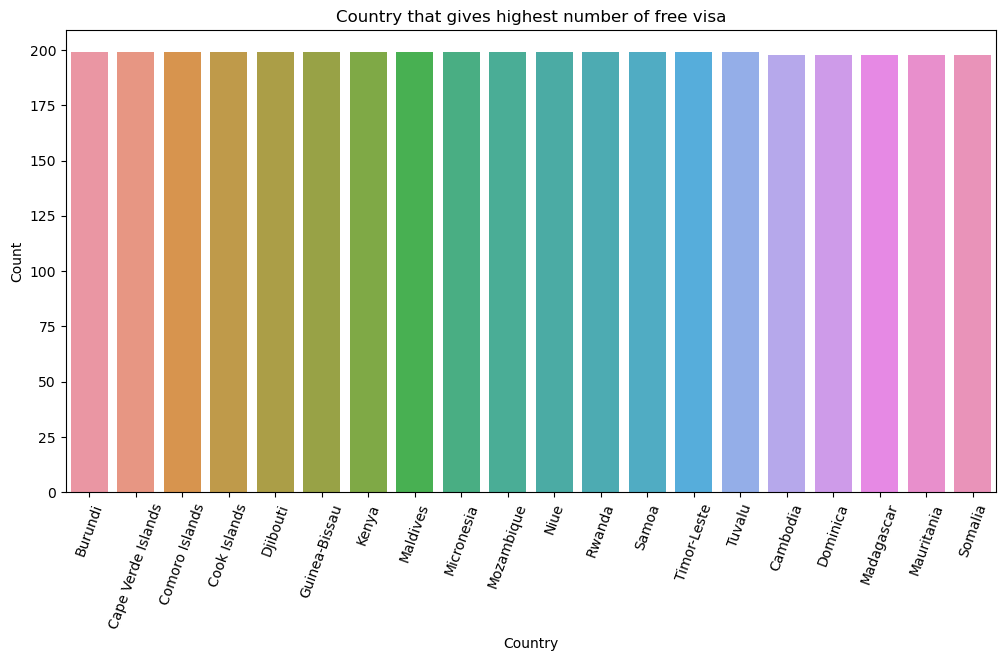

In [16]:
country_that_give_most_free_visa = visa_dataset[visa_dataset['Requirement']=='Visa Free']\
                                   .groupby('Destination')\
                                   .size()\
                                   .reset_index(name='Count')\
                                   .nlargest(20,'Count')
                                   
                                   

# Drop the 'index' column
country_that_give_most_free_visa = country_that_give_most_free_visa.reset_index(drop=True)
print(country_that_give_most_free_visa)

plt.figure(figsize=(12, 6))
sns.barplot(x='Destination',y='Count',data=country_that_give_most_free_visa)

plt.xlabel("Country")
plt.title("Country that gives highest number of free visa")
plt.xticks(rotation=70);

In [17]:
visa_dataset.head()

,Origin,Destination,Requirement
0,Afghanistan,Afghanistan,Visa Free
1,Afghanistan,Albania,Visa Required
2,Afghanistan,Algeria,Visa Required
3,Afghanistan,American Samoa,Visa Required
4,Afghanistan,Andorra,Visa Required


# Data Preprocessing

In [18]:
target_variable = visa_dataset['Requirement']

new_data = visa_dataset.drop(columns=['Requirement'])
new_data = pd.get_dummies(new_data,columns=['Origin','Destination'])

new_visa_dataset = pd.concat([new_data,target_variable],axis=1)
new_visa_dataset


,Origin_Afghanistan,Origin_Albania,Origin_Algeria,Origin_Andorra,Origin_Angola,Origin_Antigua and Barbuda,Origin_Argentina,Origin_Armenia,Origin_Australia,Origin_Austria,...,Destination_Uzbekistan,Destination_Vanuatu,Destination_Vatican City,Destination_Venezuela,Destination_Vietnam,Destination_Yemen,Destination_Zambia,Destination_Zimbabwe,Destination_eSwatini,Requirement
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Visa Free
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Visa Required
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Visa Required
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Visa Required
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Visa Required
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,Visa Required
45169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,Visa Required
45170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,Visa Free
45171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,Visa Free


In [19]:
X = new_visa_dataset.drop(['Requirement'],axis=1)
y =  new_visa_dataset['Requirement']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
print("X_train - >  ",X_train.shape)
print("X_test - >  ",X_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

X_train - >   (40655, 426)
X_test - >   (4518, 426)
y_train - >   (40655,)
y_test - >   (4518,)


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtc = DecisionTreeClassifier()

In [23]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
prediction = dtc.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[1863  416]
 [ 483 1756]]


               precision    recall  f1-score   support

    Visa Free       0.79      0.82      0.81      2279
Visa Required       0.81      0.78      0.80      2239

     accuracy                           0.80      4518
    macro avg       0.80      0.80      0.80      4518
 weighted avg       0.80      0.80      0.80      4518



# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)

In [27]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [28]:
predictions = rfc.predict(X_test)

In [29]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1936  343]
 [ 482 1757]]


               precision    recall  f1-score   support

    Visa Free       0.80      0.85      0.82      2279
Visa Required       0.84      0.78      0.81      2239

     accuracy                           0.82      4518
    macro avg       0.82      0.82      0.82      4518
 weighted avg       0.82      0.82      0.82      4518



In [37]:
Origin = input("Enter the Origin Country: ")
Destination = input("Enter the Destination Country: ")

input_data = pd.DataFrame({"Origin":[Origin],"Destination":[Destination]})

dummy_input = pd.get_dummies(input_data,columns=['Origin','Destination'])

dummy_input = dummy_input.reindex(columns=X_train.columns, fill_value=0)

predicted_requirement = dtc.predict(dummy_input)
predicted_requirement1 = rfc.predict(dummy_input)

print(f"Visa Requirement Predicted By(DecisionTree):",predicted_requirement)
print(f"Visa Requirement Predicted By(RandomForest):",predicted_requirement1)

Enter the Origin Country: Nepal
Enter the Destination Country: Dominica
Visa Requirement Predicted By(DecisionTree): ['Visa Free']
predicted Requirement Predicted By(RandomForest): ['Visa Free']
